## Predicting Heart Disease

There are multiple risk factors that could contribute to cardiovascular diseases in an individual, such as unhealthy diet, lack of physical activity, or mental illness.

A R&D company has a dataset including relevent information for each patient like their personal information, medical data and whether or not they've had heart disease before.

I am using this dataset to accurately predict the likelihood of a new patient having heart disease in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
heart_disease = pd.read_csv("heart_disease_prediction.csv")
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
features = heart_disease.shape[1]
observations = heart_disease.shape[0]

print(features)
print(observations)

12
918


In [4]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
heart_disease.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The average age of the patients is 54 years old. There are no missing values, but the RestingCP and Cholestrol columns could contain wrong values as they have a minimum value of 0, which is very unlikely.

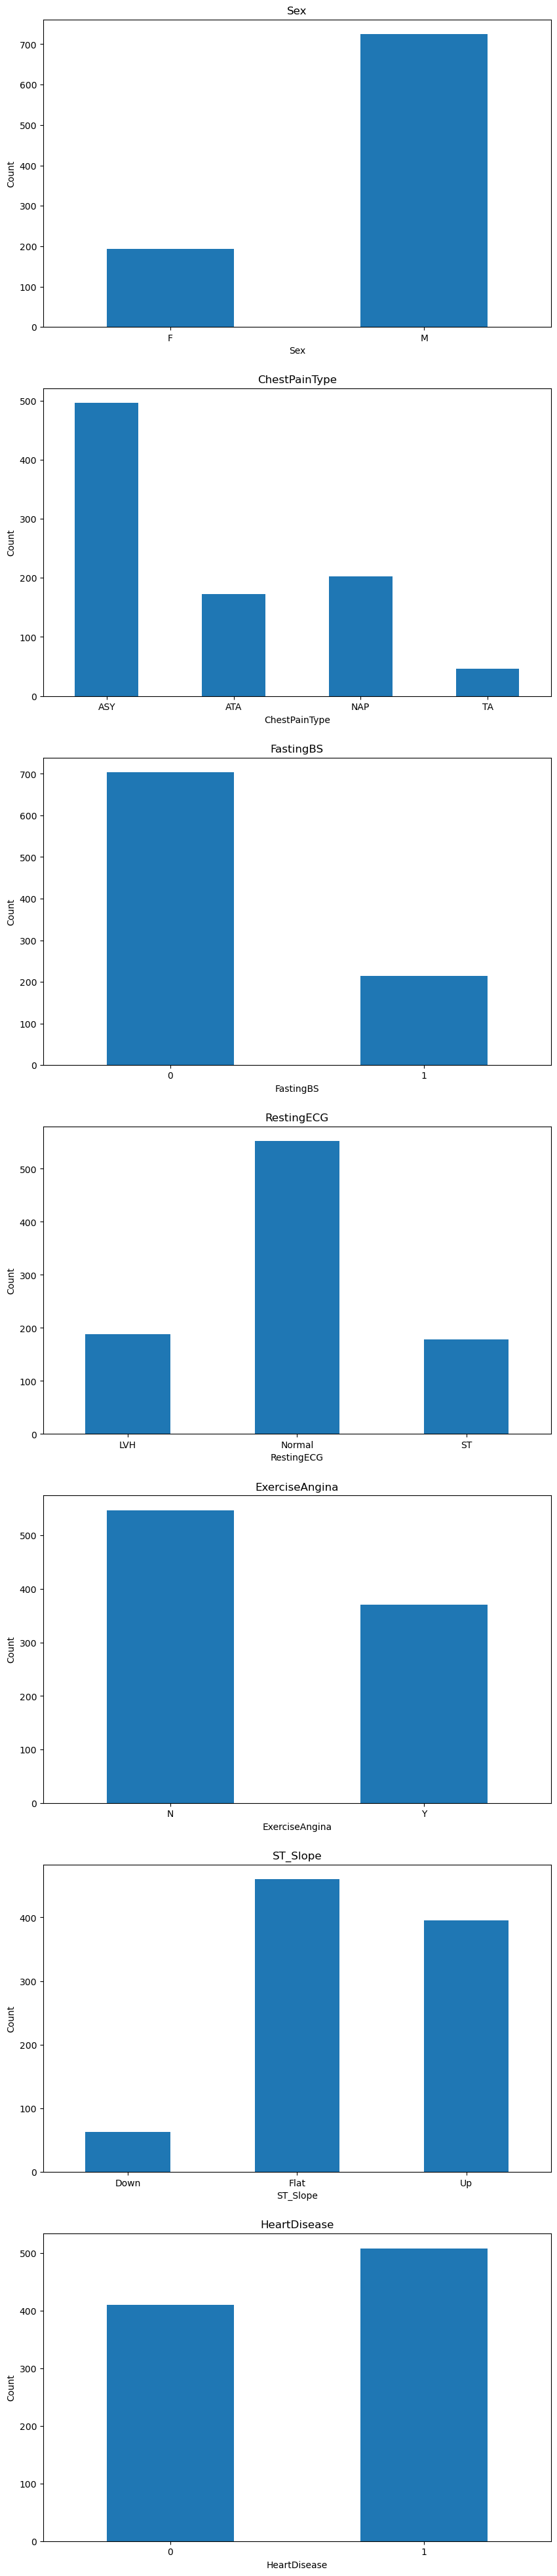

In [7]:
fig, axs = plt.subplots(7, figsize=(10,50))
categorical = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

for category,ax in zip(categorical,axs):
    heart_disease[category].value_counts().sort_index().plot.bar(ax=ax)
    ax.set_title(category)
    ax.set_xlabel(category)
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    

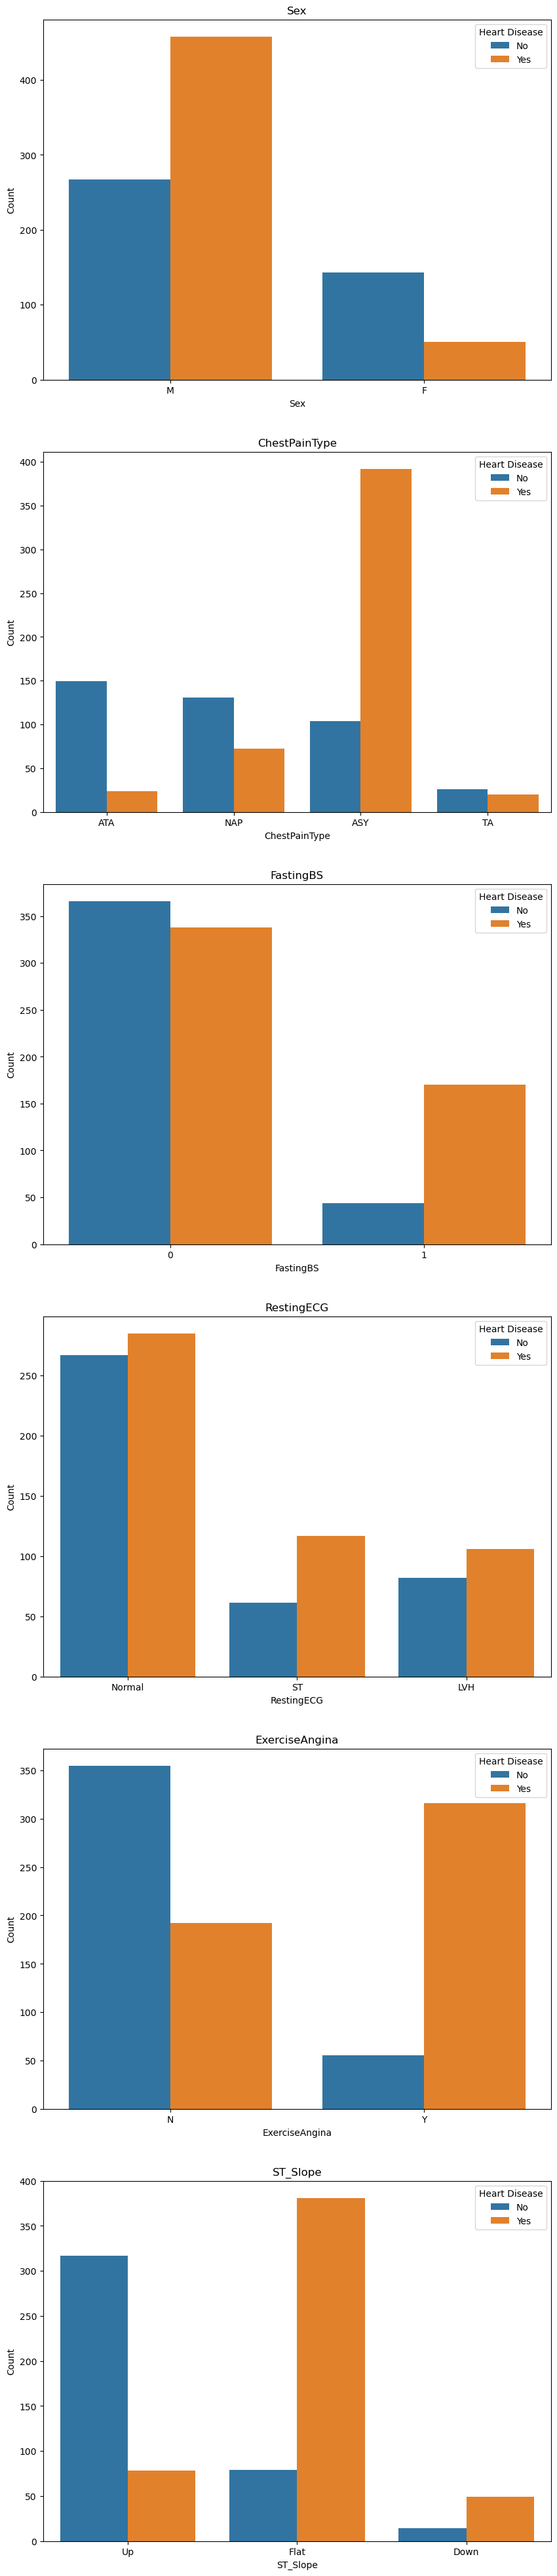

In [8]:
fig, axs = plt.subplots(6, figsize=(10,50))
categorical1 = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]

for category,ax in zip(categorical1,axs):
    sns.countplot(x=heart_disease[category], hue=heart_disease["HeartDisease"], ax=ax)
    ax.set_title(category)
    ax.set_xlabel(category)
    ax.set_ylabel("Count")
    ax.set_label("Heart Disease")
    ax.legend(["No", "Yes"], title="Heart Disease")

As we can see from the graphs, the ASY category in chest pain has the highest count for patients with heart disease, compared to the other three chest pain categories.

In [9]:
(heart_disease[(heart_disease["Age"] > 50) & (heart_disease["Sex"] == "M")].shape[0]/heart_disease.shape[0])*100

53.05010893246187

This is the percentage of patients with heart disease that are male and over 50 years old.

In [10]:
statistics.median(heart_disease["Age"][heart_disease["HeartDisease"] == 1])

57.0

The median age of patients who were diagnosed with heart disease is 57 years old.

In [11]:
print(heart_disease[heart_disease["RestingBP"] == 0].shape[0])
print(heart_disease[heart_disease["Cholesterol"] == 0].shape[0])

1
172


<AxesSubplot:>

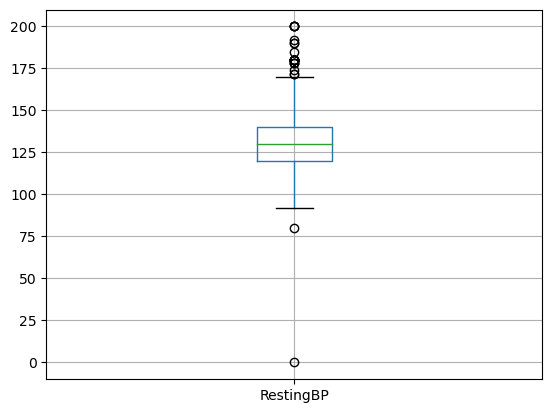

In [12]:
heart_disease.boxplot("RestingBP")

From this boxplot we can see there is just one outlier in the data for RestingBP, so we will remove it.

In [13]:
heart_disease.drop(heart_disease[heart_disease["RestingBP"] == 0].index, inplace=True)
heart_disease.reset_index()

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
print(heart_disease["Age"].max())
print(heart_disease["Age"].min())

77
28


Age ranges from 20 to 80

In [15]:
def interval_age(row):
    if row < 30:
        return "20s"
    elif row < 40:
        return "30s"
    elif row < 50:
        return "40s"
    elif row < 60:
        return "50s"
    elif row < 70:
        return "60s"
    elif row < 80:
        return "70s"

    
heart_disease["Interval_age"] = heart_disease["Age"].apply(interval_age)
avg_chol_int_age = heart_disease.groupby("Interval_age").mean()["Cholesterol"]

for groups in ["20s","30s","40s","50s","60s","70s"]:
    heart_disease.loc[(heart_disease["Cholesterol"] == 0) & (heart_disease["Interval_age"] == groups),"Cholesterol"] = avg_chol_int_age.loc[groups]

heart_disease["Cholesterol"] = heart_disease["Cholesterol"].round(2)

I replaced the patients with cholesterol values of 0 with the mean cholesterol of the age group they're in.

In [16]:
heart_disease = heart_disease.drop("Interval_age", axis=1)
heart_disease = pd.get_dummies(heart_disease, drop_first=True)
heart_disease

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


Text(0.5, 1.0, "Pearson's correlation heat map")

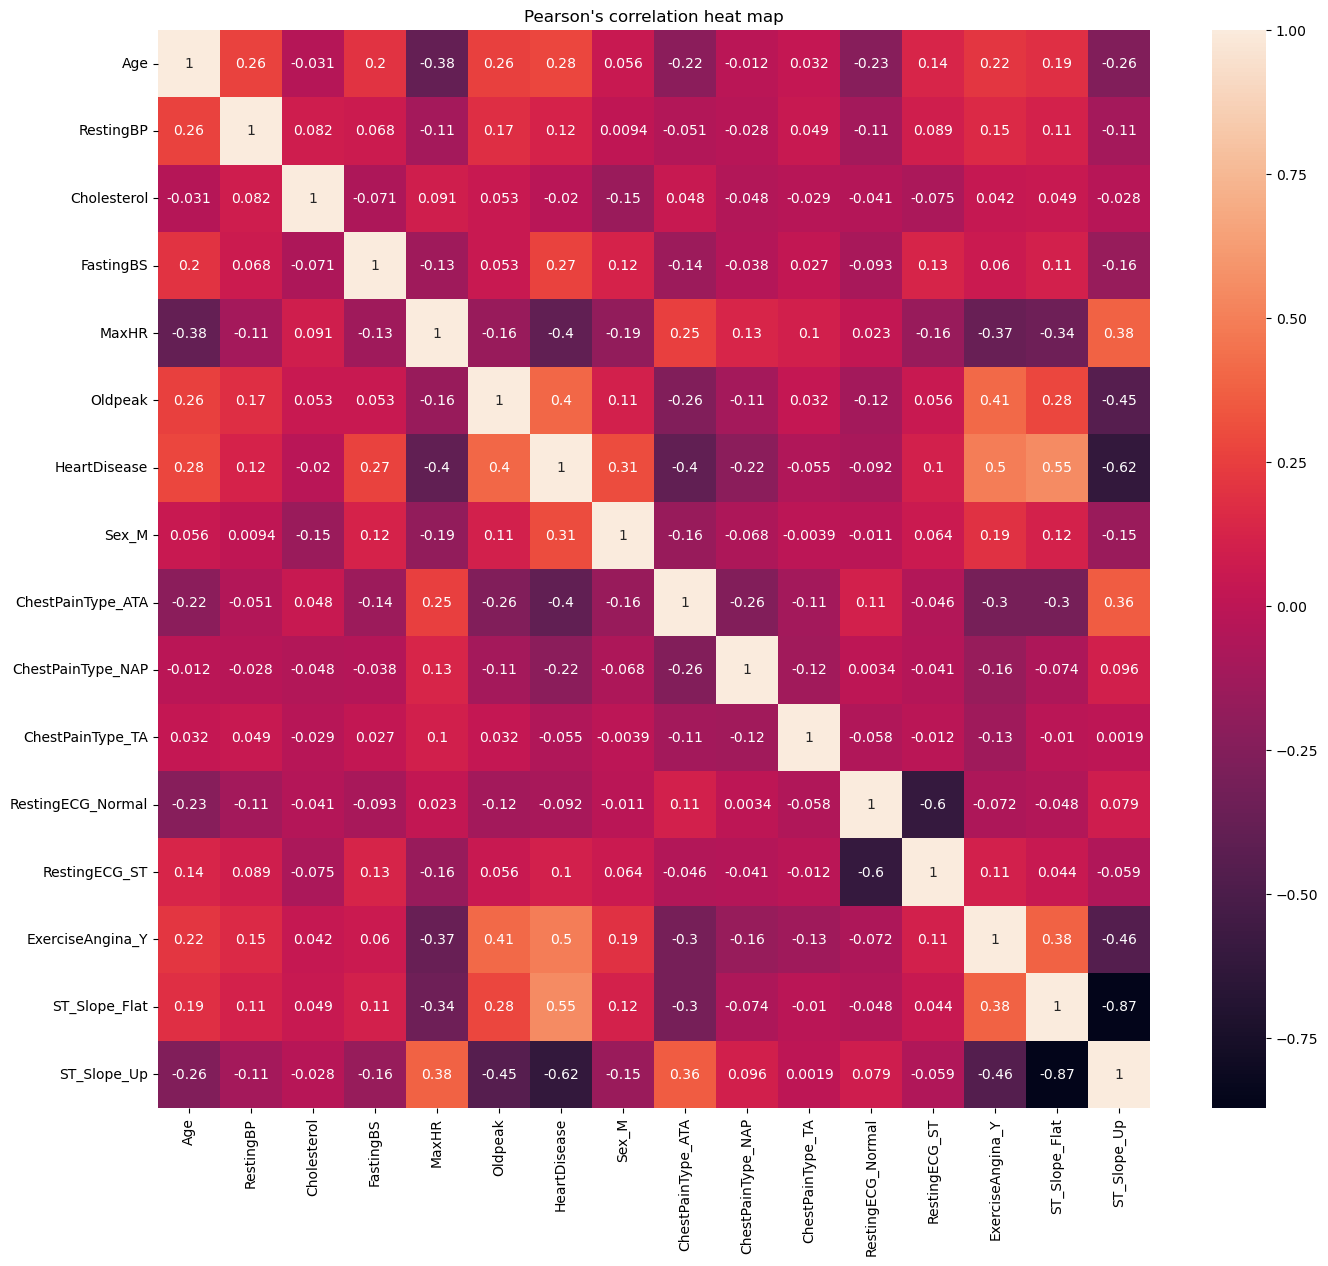

In [17]:
plt.figure(figsize=(16,14))
sns.heatmap(heart_disease.corr(), annot=True)
plt.title("Pearson's correlation heat map")

In [18]:
abs(heart_disease.corr())["HeartDisease"].sort_values(ascending=False).head(6)

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
Name: HeartDisease, dtype: float64

From the heatmap, the features most correlated to heart disease are:

* ST_Slope_Up
* ST_Slope_Flat
* ExerciseAngina_Y
* Oldpeak
* ChestPainType_ATA

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = heart_disease.drop("HeartDisease", axis=1)
y = heart_disease["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2*(len(X)/len(X_train)), random_state=8)

#print(len(X_train))
#print(len(X_test))
#print(len(X_val))

features = ["ST_Slope_Up", "ST_Slope_Flat", "ExerciseAngina_Y", "Oldpeak", "ChestPainType_ATA"]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 8)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(round(accuracy*100, 2), feature)

80.98 ST_Slope_Up
76.09 ST_Slope_Flat
73.37 ExerciseAngina_Y
72.28 Oldpeak
73.91 ChestPainType_ATA


The model that performed the best was the ST_Slope_Up feature, with 81% accuracy.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn_scaled = KNeighborsClassifier(n_neighbors = 8)
knn_scaled.fit(X_train_scaled, y_train)
accuracy = knn_scaled.score(X_val_scaled, y_val)
print(round(accuracy*100, 2))

83.15


The accuracy has slightly increased to 83.15% for the features now that they have been normalized.

In [21]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X_train_scaled = scaler.fit_transform(X_train[features])
params_dict = {"n_neighbors": [x for x in range(10)],
               "weights": ["uniform", "distance"],
               "p": [x for x in range(5)]}

param_knn = KNeighborsClassifier(n_neighbors = 8)
grid_knn = GridSearchCV(estimator=param_knn, param_grid=params_dict, scoring="accuracy")
grid_knn.fit(X_train_scaled, y_train)

print("The best score: " + str(round(grid_knn.best_score_*100, 2)) + "%")
print("The best parameters: " + str(grid_knn.best_params_))


The best score: 83.46%
The best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py", line 446, in _fit
    self._check_algorithm_metric()
  File "/opt/conda/lib/python3.10/site-packages/skle

In [24]:
from sklearn.metrics import accuracy_score

X_test_scaled = scaler.transform(X_test[features])
predict_test = grid_knn.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predict_test)

print(round(accuracy*100, 2))

81.16


The accuracy on the test set was lower than the validation set. Therefore, this model is not great for predicting heart disease. This is due to the large proportion of the dataset being male and that in this dataset, cholesterol is not related to heart disease when in reality it is.

In [27]:
heart_disease["Sex_M"].value_counts()

1    724
0    193
Name: Sex_M, dtype: int64